# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold the requested data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : albany
City not found. Skipping...
Processing Record 2 of Set 1 : port hardy
Processing Record 3 of Set 1 : mount gambier
Processing Record 4 of Set 1 : krasnoselkup
Processing Record 5 of Set 1 : kaitangata
City not found. Skipping...
Processing Record 6 of Set 1 : punta arenas
Processing Record 7 of Set 1 : chokurdakh
Processing Record 8 of Set 1 : severo-kurilsk
Processing Record 9 of Set 1 : kati
Processing Record 10 of Set 1 : leningradskiy
Processing Record 11 of Set 1 : santa cruz
Processing Record 12 of Set 1 : jamestown
Processing Record 13 of Set 1 : vero beach
Processing Record 14 of Set 1 : olafsvik
Processing Record 15 of Set 1 : shahdol
City not found. Skipping...
Processing Record 16 of Set 1 : bara
Processing Record 17 of Set 1 : lianzhou
Processing Record 18 of Set 1 : sao borja
Processing Record 19 of Set 1 : san benito
City not found. Skipping...
Processing Record 20 of Set 1 : lud

Processing Record 39 of Set 4 : kangra
Processing Record 40 of Set 4 : gerede
Processing Record 41 of Set 4 : buala
Processing Record 42 of Set 4 : reconquista
Processing Record 43 of Set 4 : coquimbo
Processing Record 44 of Set 4 : kodiak
Processing Record 45 of Set 4 : arica
Processing Record 46 of Set 4 : arraial do cabo
City not found. Skipping...
City not found. Skipping...
Processing Record 47 of Set 4 : menongue
Processing Record 48 of Set 4 : bell ville
Processing Record 49 of Set 4 : kutum
Processing Record 50 of Set 4 : jati
Processing Record 0 of Set 5 : ilulissat
Processing Record 1 of Set 5 : sarapul
Processing Record 2 of Set 5 : kahului
Processing Record 3 of Set 5 : cabo san lucas
Processing Record 4 of Set 5 : labytnangi
Processing Record 5 of Set 5 : severobaykalsk
Processing Record 6 of Set 5 : booue
Processing Record 7 of Set 5 : sabang
Processing Record 8 of Set 5 : norman wells
Processing Record 9 of Set 5 : khani
Processing Record 10 of Set 5 : dalvik
Processing 

City not found. Skipping...
Processing Record 23 of Set 8 : lasa
City not found. Skipping...
Processing Record 24 of Set 8 : george town
Processing Record 25 of Set 8 : batagay
Processing Record 26 of Set 8 : pevek
Processing Record 27 of Set 8 : yuanping
Processing Record 28 of Set 8 : altoona
Processing Record 29 of Set 8 : ponta delgada
Processing Record 30 of Set 8 : pochutla
Processing Record 31 of Set 8 : kingman
Processing Record 32 of Set 8 : havre-saint-pierre
Processing Record 33 of Set 8 : yarensk
Processing Record 34 of Set 8 : lakatoro
Processing Record 35 of Set 8 : arman
Processing Record 36 of Set 8 : thompson
Processing Record 37 of Set 8 : micomeseng
Processing Record 38 of Set 8 : liverpool
Processing Record 39 of Set 8 : san felipe
Processing Record 40 of Set 8 : lakes entrance
Processing Record 41 of Set 8 : zapolyarnyy
Processing Record 42 of Set 8 : pianoro
Processing Record 43 of Set 8 : watsa
Processing Record 44 of Set 8 : sakakah
Processing Record 45 of Set 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_data = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [6]:
# Create a weather dictionary
weather_data.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [7]:
# Display the Weather Data Frame
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,100,US,1608099768,35,42.60,-73.97,-6.67,1.81
1,Port Hardy,90,CA,1608099768,87,50.70,-127.42,7.00,4.60
2,Mount Gambier,90,AU,1608099769,87,-37.83,140.77,16.00,3.60
3,Krasnosel'kup,100,RU,1608099769,87,65.70,82.47,-23.20,8.99
4,Kaitangata,99,NZ,1608099769,89,-46.28,169.85,14.44,1.79
...,...,...,...,...,...,...,...,...,...
556,Shirokiy,37,RU,1608099868,85,49.76,129.52,-20.91,4.39
557,Seoul,1,KR,1608099869,29,37.57,126.98,-3.00,1.50
558,Ambovombe,75,MG,1608099869,29,-25.17,46.08,30.45,3.74
559,Meulaboh,92,ID,1608099869,81,4.14,96.13,27.15,3.11


In [8]:
# Save city data into a csv file
weather_data.to_csv("output_data/cities.csv", index = False)

In [9]:
#Create Statistics table

weather_data.agg({'Lat':['count', 'mean', 'std', 'min','max'],
                'Lng':['count', 'mean', 'std', 'min', 'max'],
                 'Max Temp':['count', 'mean', 'std', 'min', 'max'],
                 'Humidity':['count', 'mean', 'std', 'min','max'],
                 'Cloudiness':['count', 'mean', 'std', 'min','max'],
                 'Wind Speed':['count', 'mean', 'std', 'min','max'],
                 'Date':['count', 'mean', 'std', 'min','max'],})




,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.00000,561.000000,561.000000,5.610000e+02
mean,19.444403,15.663405,10.160089,73.88057,54.812834,3.837754,1.608100e+09
std,33.543865,91.299993,16.733731,19.92087,39.214186,3.170036,7.690604e+01
min,-54.800000,-175.200000,-42.440000,1.00000,0.000000,0.200000,1.608099e+09
max,78.220000,179.320000,39.000000,100.00000,100.000000,20.600000,1.608100e+09


In [10]:
#need to find out how to get it to the percentages in aggregate statements.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#There are no cities over 100% humidity

weather_data.agg({'Lat':['count', 'mean', 'std', 'min','max'],
                'Lng':['count', 'mean', 'std', 'min', 'max'],
                 'Max Temp':['count', 'mean', 'std', 'min', 'max'],
                 'Humidity':['count', 'mean', 'std', 'min','max'],
                 'Cloudiness':['count', 'mean', 'std', 'min','max'],
                 'Wind Speed':['count', 'mean', 'std', 'min','max'],
                 'Date':['count', 'mean', 'std', 'min','max'],})

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.00000,561.000000,561.000000,5.610000e+02
mean,19.444403,15.663405,10.160089,73.88057,54.812834,3.837754,1.608100e+09
std,33.543865,91.299993,16.733731,19.92087,39.214186,3.170036,7.690604e+01
min,-54.800000,-175.200000,-42.440000,1.00000,0.000000,0.200000,1.608099e+09
max,78.220000,179.320000,39.000000,100.00000,100.000000,20.600000,1.608100e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
#Max humidity is at 100%, nothing is over the 100% humidity

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Not applicable

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

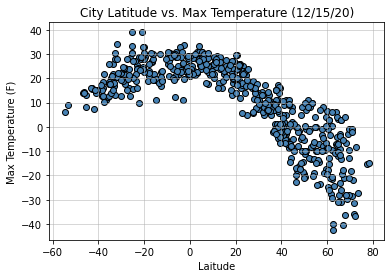

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

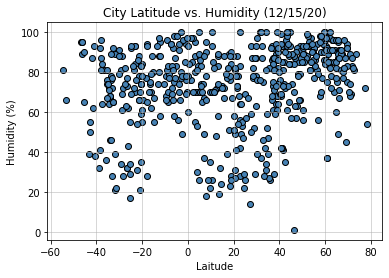

In [13]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

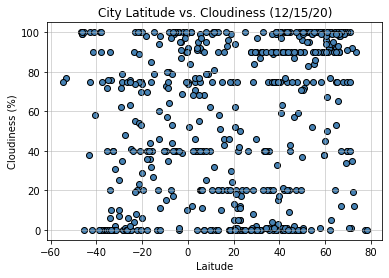

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

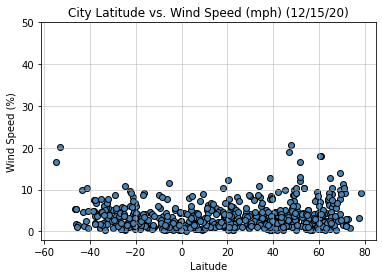

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [17]:
# Define function for creating linear agression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


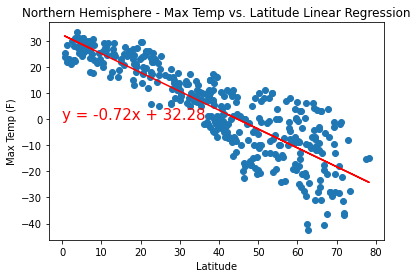

In [18]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.52


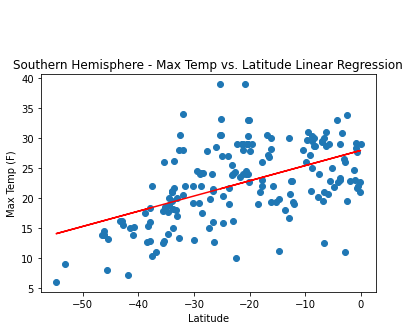

In [19]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


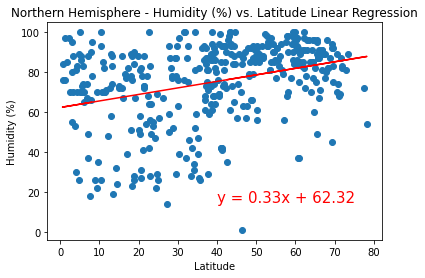

In [20]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.21


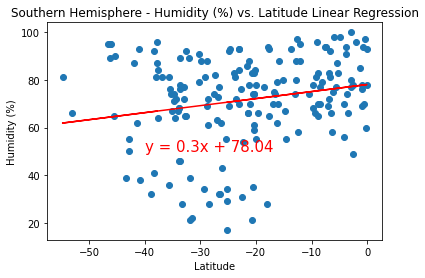

In [21]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.27


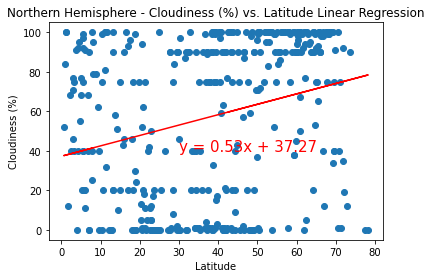

In [23]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.25


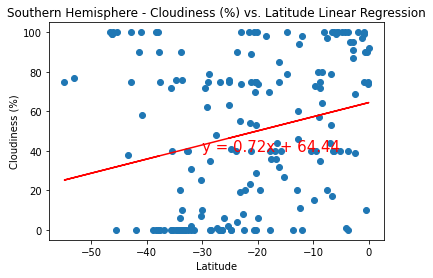

In [24]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.2


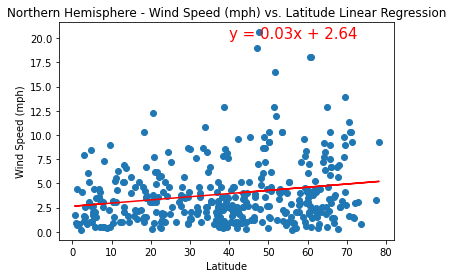

In [25]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.32


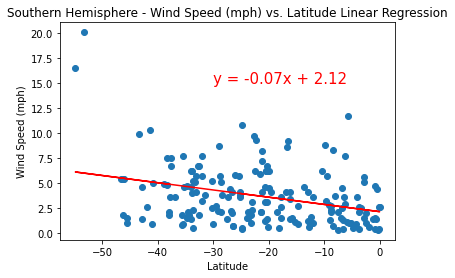

In [26]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")